# Imports

In [1]:
import os
os.chdir("D:\PulpitE\FPL_ML")

In [2]:
import pandas as pd
import numpy as np
import PIL
import urllib

# Data

In [3]:
df = pd.read_csv("predictions/predictions_fwd.csv")

In [4]:
df['H/A'] = np.where(df['Was Home'] == 1, 'H', 'A')

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'Day', 'Comp', 'Round', 'Venue', 'Squad',
       'Opponent', 'Start', 'Pos', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh',
       'SoT', 'CrdY', 'CrdR', 'Touches', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG',
       'xAG', 'SCA', 'GCA', 'Cmp', 'Att', 'Cmp%', 'PrgP', 'Carries', 'PrgC',
       'Att.1', 'Succ', 'Match Report', 'Name', 'Season', 'WDL', 'GoalsTeams',
       'Team Score', 'Opp Score', 'CS', 'Was Home', 'GW', 'FPL',
       'neutral_name', 'Total Points', 'FPL position', 'Opp rating',
       'ScoreForLast5', 'ScoreAgainstLast5', 'Points', 'H/A'],
      dtype='object')

In [6]:
# df.iloc[0]

In [7]:
df.shape

(30, 55)

# Plot table

In [8]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

import plottable
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image, image # image

In [9]:
df = df.rename(columns={"Squad": "Team", "Points": "Prediction"}, errors="raise")

In [10]:
def team_to_logo(team_name):
    if team_name == "Arsenal":
        return "https://resources.premierleague.com/premierleague/badges/70/t3.png"
    if team_name == "Chelsea":
        return "https://resources.premierleague.com/premierleague/badges/70/t8.png"
    if team_name == "Nott'ham Forest":
        return "https://resources.premierleague.com/premierleague/badges/70/t17.png"
    if team_name == "Leicester City":
        return "https://resources.premierleague.com/premierleague/badges/70/t13.png"
    if team_name == "Leeds United":
        return "https://resources.premierleague.com/premierleague/badges/70/t2.png"
    if team_name == "Manchester City":
        return "https://resources.premierleague.com/premierleague/badges/70/t43.png"
    if team_name == "Manchester Utd":
        return "https://resources.premierleague.com/premierleague/badges/70/t1.png"
    if team_name == "Tottenham":
        return "https://resources.premierleague.com/premierleague/badges/70/t6.png"
    if team_name == "Newcastle Utd":
        return "https://resources.premierleague.com/premierleague/badges/70/t4.png"
    if team_name == "Aston Villa":
        return "https://resources.premierleague.com/premierleague/badges/70/t7.png"
    if team_name == "Bournemouth":
        return "https://resources.premierleague.com/premierleague/badges/70/t91.png"
    if team_name == "Wolves":
        return "https://resources.premierleague.com/premierleague/badges/70/t39.png"
    if team_name == "Southampton":
        return "https://resources.premierleague.com/premierleague/badges/70/t20.png"
    if team_name == "Fulham":
        return "https://resources.premierleague.com/premierleague/badges/70/t54.png"
    if team_name == "Crystal Palace":
        return "https://resources.premierleague.com/premierleague/badges/70/t31.png"
    if team_name == "Brentford":
        return "https://resources.premierleague.com/premierleague/badges/70/t94.png"
    if team_name == "Everton":
        return "https://resources.premierleague.com/premierleague/badges/70/t11.png"
    if team_name == "Brighton":
        return "https://resources.premierleague.com/premierleague/badges/70/t36.png"
    if team_name == "West Ham":
        return "https://resources.premierleague.com/premierleague/badges/70/t21.png"
    if team_name == "Liverpool":
        return "https://resources.premierleague.com/premierleague/badges/70/t14.png"
    return "https://resources.premierleague.com/premierleague/badges/70/t21.png"

In [11]:
df["Logo_team"] = df["Team"].apply(team_to_logo)
df["Logo_opponent"] = df["Opponent"].apply(team_to_logo)

In [12]:
cols = [
    "Name",
    "Logo_team",
    "Team",
    "Logo_opponent",
    "Opponent",
    "H/A",
    "Prediction"
]

In [13]:
df = df[cols]

In [14]:
df = df.set_index("Name")

In [15]:
df.iloc[0]

Logo_team        https://resources.premierleague.com/premierlea...
Team                                               Manchester City
Logo_opponent    https://resources.premierleague.com/premierlea...
Opponent                                                    Wolves
H/A                                                              H
Prediction                                                    5.74
Name: Erling-Haaland, dtype: object

In [16]:
cmap = LinearSegmentedColormap.from_list(
    name="points_cmap", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=512
)

In [17]:
plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"

In [32]:
col_defs = (
    [
        ColumnDefinition(
            name="Name",
            textprops={"ha": "left", "weight": "bold"},
            width=1,
        ),
        ColumnDefinition(
            name="Logo_team",
            title="Team",
            textprops={"ha": "left"},
            width=0.1,
            plot_fn=image,
        ),
        ColumnDefinition(
            name="Team",
            title="",
            textprops={"ha": "left"},
            width=0.9,
        ),
        ColumnDefinition(
            name="Logo_opponent",
            title="Opponent",
            textprops={"ha": "left"},
            width=0.1,
            plot_fn=image,
        ),
        ColumnDefinition(
            name="Opponent",
            title="",
            textprops={"ha": "left"},
            width=0.9,
        ),
        ColumnDefinition(
            name="H/A",
            textprops={"ha": "center"},
            width=0.25,
        ),
        ColumnDefinition(
            name="Prediction",
            textprops={"ha": "center", "weight": "bold"},
            width=0.6,
            cmap=normed_cmap(df["Prediction"], cmap=cmap)
        )
    ]
)

C:\users\user\appdata\local\programs\python\python38\lib\site-packages\plottable\plots.py:23: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  img = plt.imread(path)


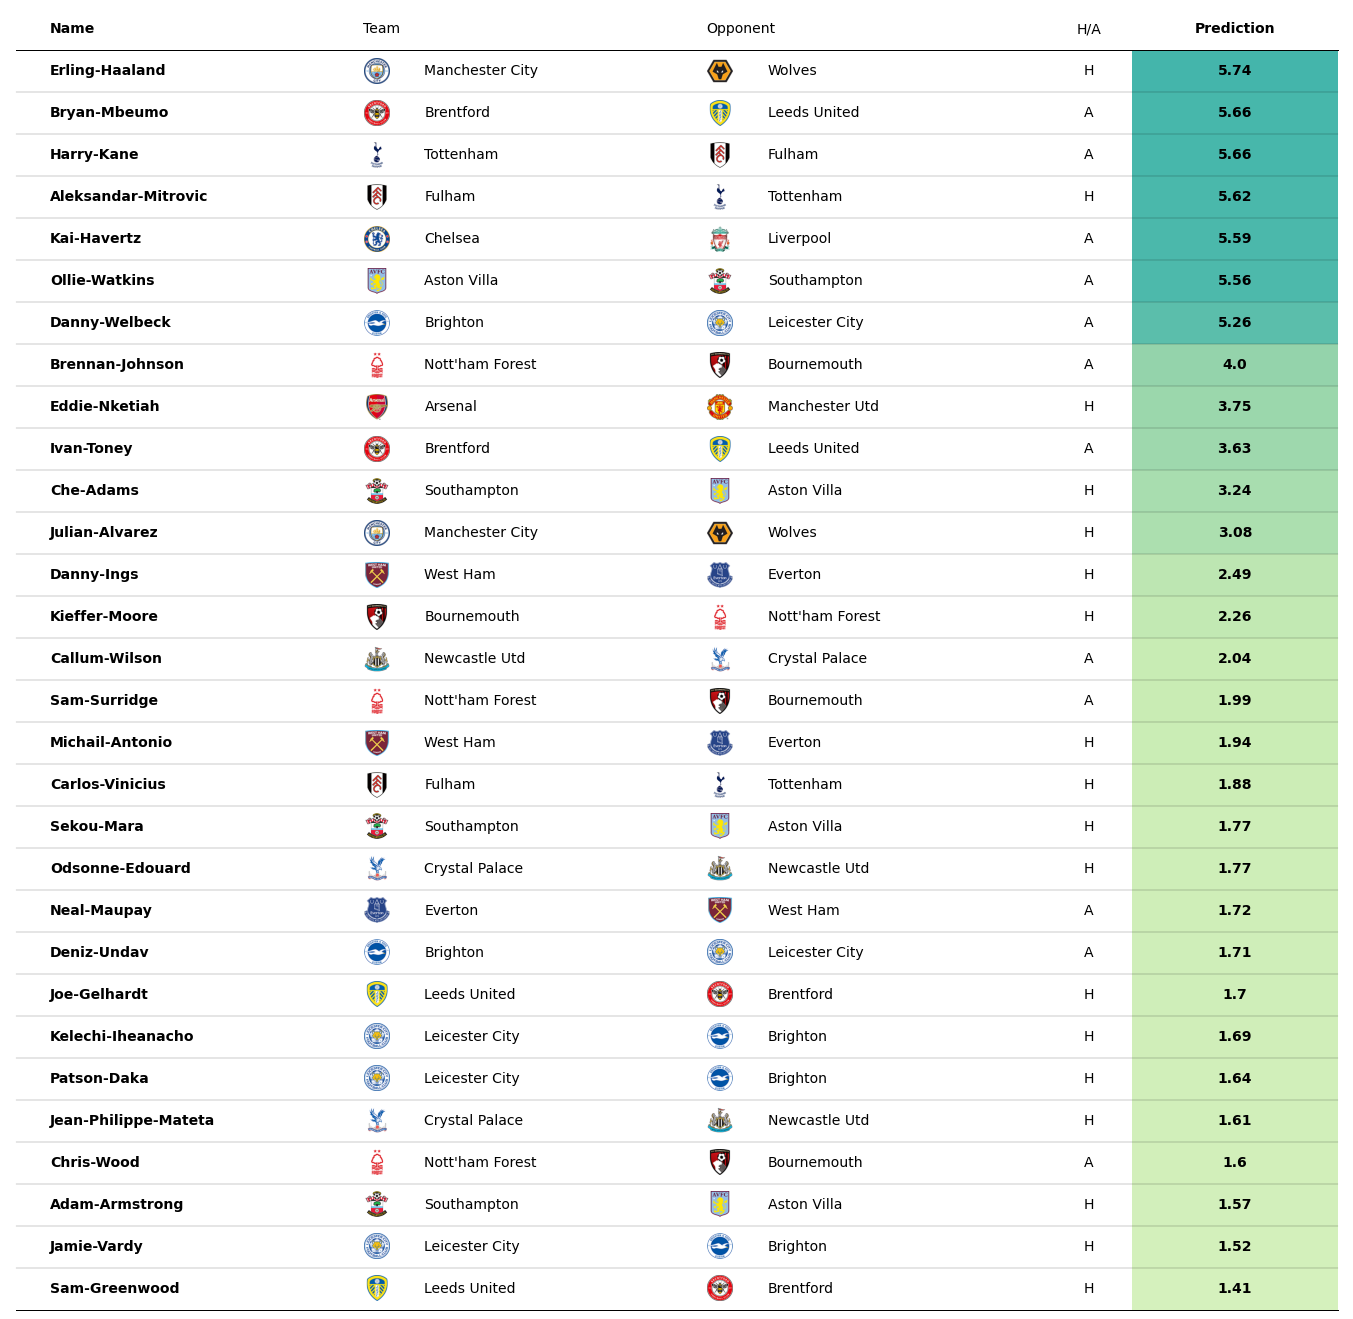

In [33]:
fig, ax = plt.subplots(figsize=(24, 24))

table = Table(
    df,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
)

# Saving plot

In [35]:
fig.savefig("plottable/predictions_fwd_plottable.png", facecolor=ax.get_facecolor(), dpi=200)